## 01分類モデル構築の流れ

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
#データを読み込む
iris = datasets.load_iris()
#X,yを生成
X, y = iris.data, iris.target
#学習データ、テストデータを生成
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

In [3]:
#説明変数（特徴量）：４個
print("feature_names:{}".format(iris.feature_names))
#目的変数：３個
print("target_name:{}".format(iris.target_names))
#Xサイズ：150*4行列、Yサイズ：150
print("X.shape:{}, y.shape:{}".format(X.shape, y.shape))
print("X_train.shape:{}, y_train.shape:{}".format(X_train.shape, y_train.shape))

feature_names:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_name:['setosa' 'versicolor' 'virginica']
X.shape:(150, 4), y.shape:(150,)
X_train.shape:(105, 4), y_train.shape:(105,)


## 02サポートベクタマシン

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
#サンプリング
np.random.seed(123)
x0 = np.random.uniform(size=(100, 2))
x1 = np.random.uniform(low=-1.0, high=0.0, size=(100, 2))

In [6]:
y0 = np.repeat(0, 100)
y1 = np.repeat(1, 100)

In [7]:
print(x0.shape)
print(y0.shape)

(100, 2)
(100,)


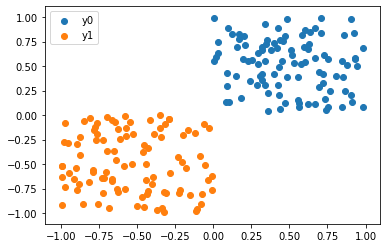

In [8]:
fig, ax = plt.subplots()
ax.scatter(x0[:, 0], x0[:, 1], label="y0")
ax.scatter(x1[:, 0], x1[:, 1], label="y1")
ax.legend()
plt.show()

In [9]:
from sklearn.svm import SVC
def plot_boundary_margin(x0, x1, y0, y1, xmin, xmax, ymin, ymax, C, kernel, n=100):
    svc = SVC(C=C, kernel=kernel)
    svc.fit(np.vstack((x0, x1)), np.hstack((y0, y1)))
    
    fig, ax = plt.subplots()
    ax.scatter(x0[:, 0], x0[:, 1], label="y0")
    ax.scatter(x1[:, 0], x1[:, 1], label="y1")
    ax.legend()
    
    # 1.n*nグリッドデータ
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, n), np.linspace(ymin, ymax, n))
    # 2.(n**2) * 2
    xy = np.vstack((np.ravel(xx), np.ravel(yy))).T
    
    # 3.decision_functionで返す値のサイズ：(n**2,)
    p = svc.decision_function(xy).reshape((n, n))
    
    # 4.xx,yy,pのサイズ：n*n,等高線を描画、xx,yy指定の範囲でpを描画
    ax.contour(xx, yy, p, linestyles=[":", "--", "-."], levels=[-1, 0, 1])
    
    # 5.サポートベクタを描画
    sv = svc.support_vectors_
    ax.scatter(sv[:, 0],sv[:, 1],edgecolors="black")
    
    plt.show()

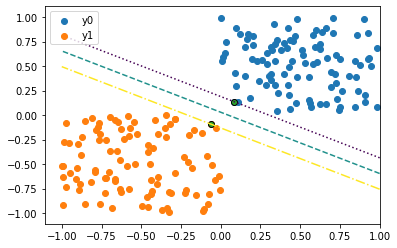

In [10]:
plot_boundary_margin(x0, x1, y0, y1, xmin=-1, xmax=1, ymin=-1, ymax=1, C=1e3, kernel="linear")

In [11]:
def plot_boundary_margin02(x0, x1, y0, y1, xmin, xmax, ymin, ymax, C, kernel, n=100):
    svc = SVC(C=C, kernel=kernel)
    svc.fit(np.vstack((x0, x1)), np.hstack((y0, y1)))
    
    fig, ax = plt.subplots()
    ax.scatter(x0[:, 0], x0[:, 1], label="y0")
    ax.scatter(x1[:, 0], x1[:, 1], label="y1")
    ax.legend(loc="best")
    
    b = svc.intercept_
    w = svc.coef_[0]
    a = -w[0] / w[1]
    
    x_plot = np.linspace(xmin, xmax)
    y_plot = a * x_plot - (b / w[1])
    
    ax.plot(x_plot, y_plot)
    
    sv = svc.support_vectors_
    down = sv[0]
    up = sv[-1]
    yy_down = a * x_plot + (down[1] - a*down[0]) 
    yy_up = a * x_plot + (up[1] - a*up[0])
    ax.plot(x_plot, yy_down, color="r", linestyle="--")
    ax.plot(x_plot, yy_up, color="k", linestyle="-.")
    
    plt.show()

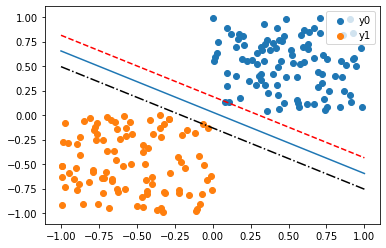

In [12]:
plot_boundary_margin02(x0, x1, y0, y1, xmin=-1, xmax=1, ymin=-1, ymax=1, C=1e3, kernel="linear")

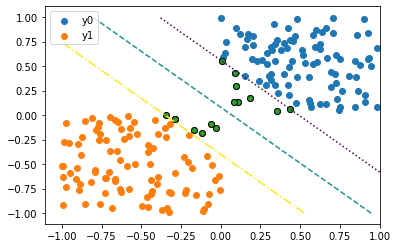

In [13]:
#C=1
plot_boundary_margin(x0, x1, y0, y1, xmin=-1, xmax=1, ymin=-1, ymax=1, C=1, kernel="linear")

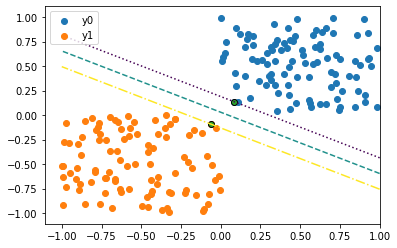

In [14]:
#C=1e20
plot_boundary_margin(x0, x1, y0, y1, xmin=-1, xmax=1, ymin=-1, ymax=1, C=1e20, kernel="linear")

### kernel=rbf

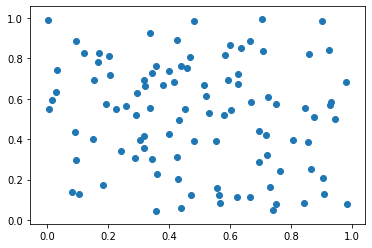

In [15]:
np.random.seed(123)
X = np.random.uniform(size=(100,2))
plt.scatter(X[:, 0], X[:, 1])

In [16]:
y = (X[:, 1] > 2 * ((X[:, 0] - 0.5) ** 2) + 0.5).astype(np.int)

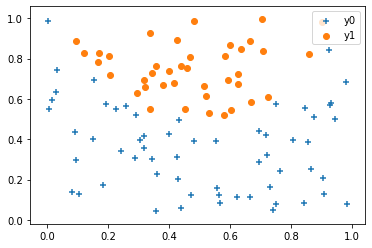

In [17]:
plt.scatter(X[y==0, 0], X[y==0, 1], marker="+", label="y0")
plt.scatter(X[y==1, 0], X[y==1, 1], marker="o", label="y1")
plt.legend(loc="best")
plt.show()

In [18]:
x0, x1, y0, y1 = X[y==0, :], X[y==1, :], y[y==0], y[y==1]
print(x0.shape,x1.shape,y0.shape,y1.shape)

(60, 2) (40, 2) (60,) (40,)


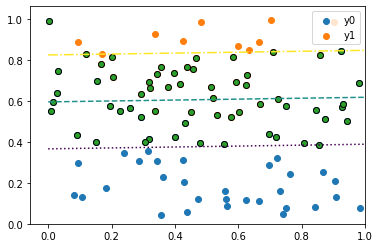

In [19]:
#kernel="linear"、直線で分離できない
plot_boundary_margin(x0, x1, y0, y1, xmin=0, xmax=1, ymin=0, ymax=1, C=1, kernel="linear")

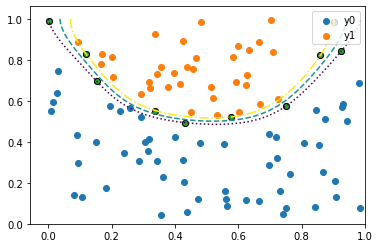

In [20]:
#kernel="rbf"
plot_boundary_margin(x0, x1, y0, y1, xmin=0, xmax=1, ymin=0, ymax=1, C=1e3, kernel="rbf")

### iris

In [21]:
from sklearn import datasets as db

In [22]:
iris = db.load_iris()

In [23]:
X, y = iris.data, iris.target

In [24]:
X[:5, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [25]:
X = X[:, 0:2]

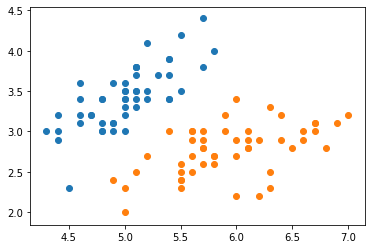

In [26]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
#plt.scatter(X[y==2, 0], X[y==2, 1])

In [27]:
x0, x1, y0, y1 = X[y==0, :], X[y==1, :], y[y==0], y[y==1]

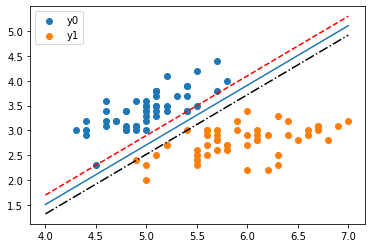

In [28]:
plot_boundary_margin02(x0, x1, y0, y1, xmin=4, xmax=7, ymin=1.5, ymax=4.5, C=1e3, kernel="linear")

## 03決定木

In [29]:
iris = db.load_iris()
X, y = iris.data, iris.target

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
dtc = DecisionTreeClassifier(max_depth=3)

In [33]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
dtc.score(X_test, y_test)

1.0

### 決定木限界をプロット

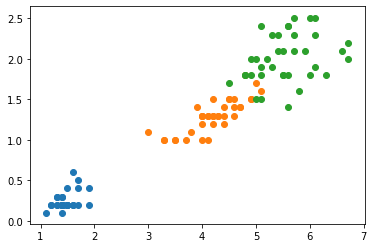

In [35]:
X_train01 = X_train[:, 2:]
X_test01 = X_test[:, 2:]

plt.scatter(X_train01[y_train==0, 0], X_train01[y_train==0, 1])
plt.scatter(X_train01[y_train==1, 0], X_train01[y_train==1, 1])
plt.scatter(X_train01[y_train==2, 0], X_train01[y_train==2, 1])

plt.show()

In [36]:
X_train01[:5, :]

array([[3.7, 1. ],
       [5.1, 1.5],
       [5.5, 1.8],
       [4.4, 1.4],
       [6.1, 2.5]])

In [37]:
dtc01 = DecisionTreeClassifier(max_depth=3)
dtc01.fit(X_train01, y_train)
dtc01.score(X_test01, y_test)

1.0

In [38]:
xmin = np.min(X_train01[:, 0]) - 0.1
xmax = np.max(X_train01[:, 0]) + 0.1
ymin = np.min(X_train01[:, 1]) - 0.1
ymax = np.max(X_train01[:, 1]) + 0.1

print(xmin, xmax, ymin, ymax)

1.0 6.8 0.0 2.6


In [39]:
def plot_decision_tree(alg, x_t, y_t, xmin, xmax, ymin, ymax, n=100):
    # 1.n*nグリッドデータ
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, n), np.linspace(ymin, ymax, n))
    Z = alg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z)
    
    plt.scatter(x_t[y_t==0, 0], x_t[y_t==0, 1], label="setosa")
    plt.scatter(x_t[y_t==1, 0], x_t[y_t==1, 1], label="versicolor")
    plt.scatter(x_t[y_t==2, 0], x_t[y_t==2, 1], label="virginica")
    plt.legend()
    
    plt.show()

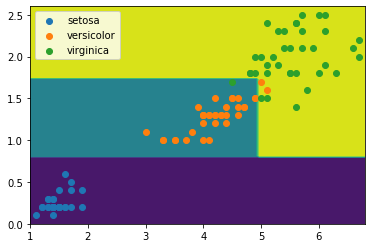

In [40]:
plot_decision_tree(dtc01, X_train01, y_train, xmin, xmax, ymin, ymax)

### 決定木PNGをプロット

In [41]:
#pip install pydotplus

In [42]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [43]:
print(iris.feature_names, iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


In [44]:
dtc_data = export_graphviz(dtc, 
                          class_names=iris.target_names, 
                          feature_names=iris.feature_names)
dtc_data

'digraph Tree {\nnode [shape=box] ;\n0 [label="petal length (cm) <= 2.45\\ngini = 0.664\\nsamples = 105\\nvalue = [31, 37, 37]\\nclass = versicolor"] ;\n1 [label="gini = 0.0\\nsamples = 31\\nvalue = [31, 0, 0]\\nclass = setosa"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="petal length (cm) <= 4.75\\ngini = 0.5\\nsamples = 74\\nvalue = [0, 37, 37]\\nclass = versicolor"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="petal width (cm) <= 1.6\\ngini = 0.059\\nsamples = 33\\nvalue = [0, 32, 1]\\nclass = versicolor"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 32\\nvalue = [0, 32, 0]\\nclass = versicolor"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]\\nclass = virginica"] ;\n3 -> 5 ;\n6 [label="petal width (cm) <= 1.75\\ngini = 0.214\\nsamples = 41\\nvalue = [0, 5, 36]\\nclass = virginica"] ;\n2 -> 6 ;\n7 [label="gini = 0.5\\nsamples = 8\\nvalue = [0, 4, 4]\\nclass = versicolor"] ;\n6 -> 7 ;\n8 [label="gi

In [45]:
graph = graph_from_dot_data(dtc_data)
graph.write_png("tree.png")

True

In [46]:
dtc_data01 = export_graphviz(dtc01, 
                          class_names=iris.target_names, 
                          feature_names=iris.feature_names[2:])

In [47]:
graph = graph_from_dot_data(dtc_data01)
graph.write_png("tree01.png")

True

## 04ランダムフォレスト

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
randomForest = RandomForestClassifier()

In [50]:
print(X_train.shape)

(105, 4)


In [51]:
randomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
randomForest.score(X_test, y_test)

1.0

In [53]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [54]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')